### Use Netflix Movies and TV Shows dataset from Kaggle and perform following operations :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
df.shape

(6234, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.drop(columns=['director','cast','country','description'], axis=1, inplace=True)

In [7]:
df.dropna(subset=['date_added',"rating"], inplace=True) # drop rows containing null values
df.shape

(6214, 8)

In [8]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,"September 8, 2017",2017,TV-14,99 min,Comedies


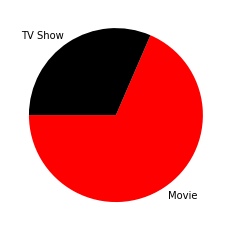

In [9]:
g = plt.pie(df.type.value_counts(), labels=df.type.value_counts().index, colors=['red','black'], startangle=180)
plt.show()

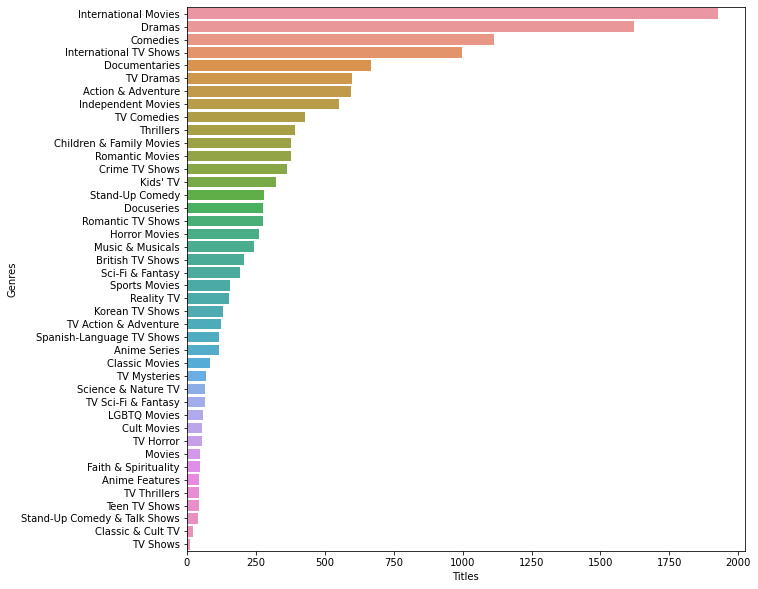

In [10]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:])
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [11]:
movies_df = df[df.type.str.contains("Movie")]
movies_df.shape

(4257, 8)

In [12]:
shows_df = df[df.type.str.contains("TV Show")]
shows_df.shape

(1957, 8)

## Make a dashboard (DASHBOARD A) containing all of these below visualizations.

## 1. Make a visualization showing the total number of movies watched by children

In [13]:
child_df=movies_df[movies_df['rating'].map(lambda x: x in ['G','TV-Y','TV-Y7','TV-Y7-FV','TV-G'])]
child_df.shape

(253, 8)

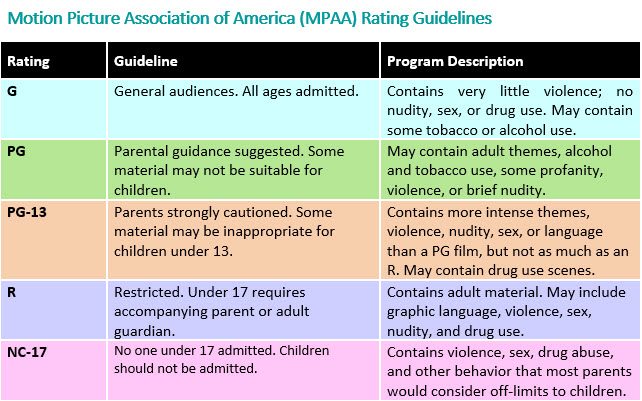

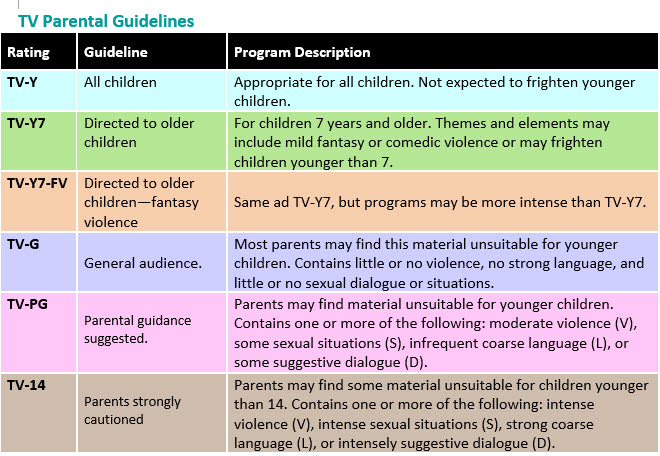

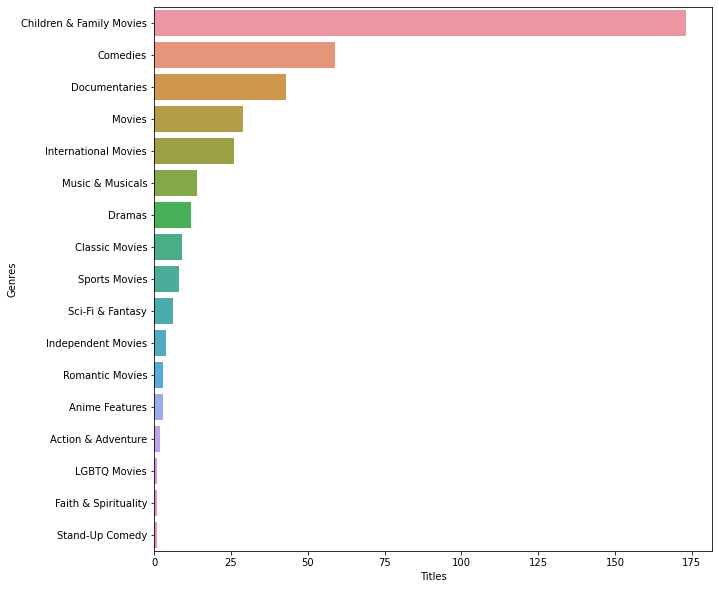

In [14]:
filtered_genres = child_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:])
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## 2. Make a visualization showing the total number of standup comedies

In [15]:
com_df=df[df.listed_in.str.contains('Stand-Up Comedy')]
com_df.shape

(323, 8)

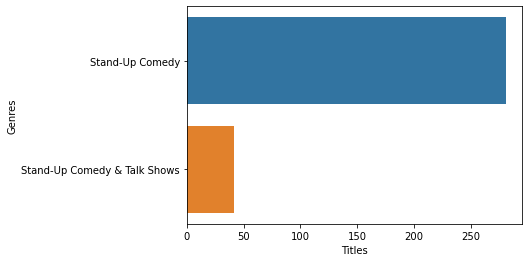

In [16]:
filtered_genres = com_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:2])
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## 3. Make a visualization showing most watched shows

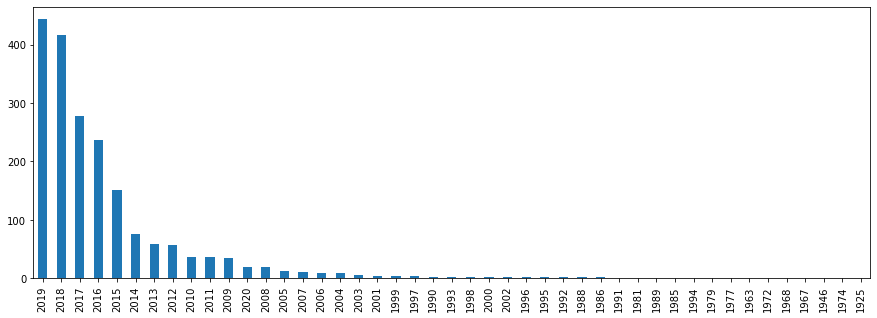

In [17]:
year_shows=shows_df["release_year"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,5))
year_shows.plot(kind="bar")

## 4. Make a visualization showing highest rated show 

In [18]:
df1=pd.read_csv('netflix.csv')
df1.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [20]:
df1 = df1.drop_duplicates(keep="first").reset_index(drop=True)

In [21]:
df1.isnull().sum()

title                  0
rating                 0
ratingLevel           33
ratingDescription      0
release year           0
user rating score    244
user rating size       0
dtype: int64

In [22]:
df1.drop(columns=['ratingLevel','ratingDescription','user rating size'],axis=1,inplace=True)
df1.shape

(500, 4)

In [23]:
df1['user rating score'].fillna(value=0)

0      82.0
1       0.0
2      98.0
3      98.0
4      94.0
       ... 
495     0.0
496     0.0
497     0.0
498     0.0
499     0.0
Name: user rating score, Length: 500, dtype: float64

In [24]:
df1.describe()

,release year,user rating score
count,500.000000,256.000000
mean,2010.976000,81.398438
std,7.829305,12.730904
min,1940.000000,55.000000
25%,2009.000000,71.000000
50%,2014.000000,83.500000
75%,2016.000000,93.000000
max,2017.000000,99.000000


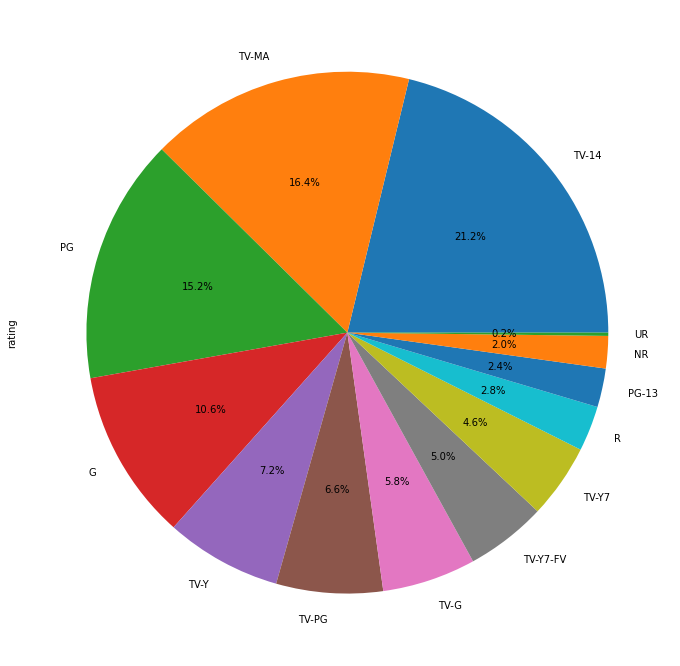

In [25]:
plt.figure(figsize=(12,12))
df1.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

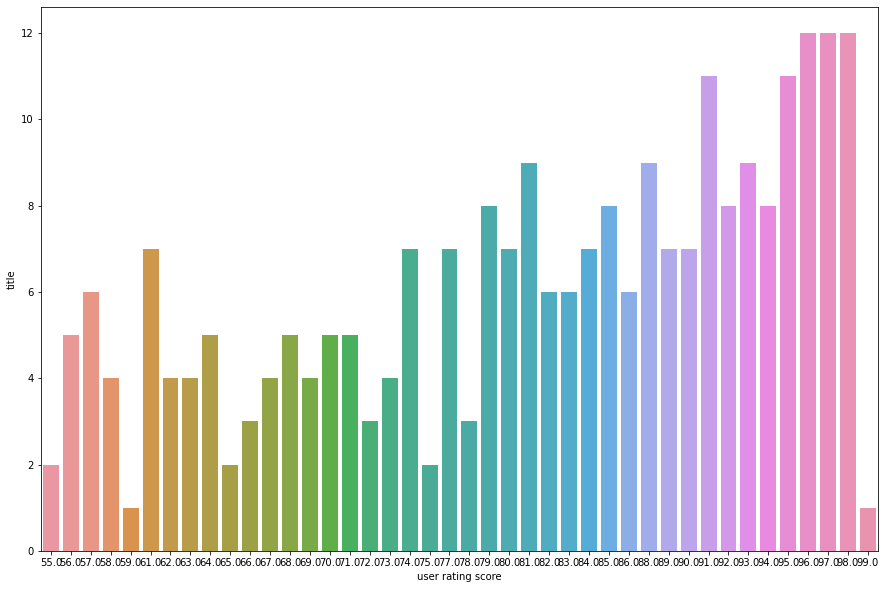

In [26]:
user_rating_score=df1.groupby("user rating score")['title'].count().reset_index().sort_values(by='user rating score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,10))
sns.barplot(x='user rating score',y='title',data=user_rating_score)

### Link for visualisations on Google Data Studio:
https://datastudio.google.com/reporting/b4cfce42-fb42-4df4-bd04-b4aa4ffa4d7d